In [2]:
!pip install opencv.python

  Obtaining dependency information for opencv.python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/39.5 MB 2.0 MB/s eta 0:00:20
   ---------------------------------------- 0.2/39.5 MB 2.2 MB/s eta 0:00:18
   ---------------------------------------- 0.4/39.5 MB 3.3 MB/s eta 0:00:12
    --------------------------------------- 0.7/39.5 MB 4.0 MB/s eta 0:00:10
   - -------------------------------------- 1.1/39.5 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.3/39.5 MB 4.6 MB/s eta 0:00:09
   - -------------------------------------- 1.9/39.5 MB 6.0 MB/s eta 0:00:07
   -- ------------------------------------- 2.5/39.5 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.5/39.5 MB 6.1 MB/s eta 0:00:07
   -- ---------

In [15]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

### Step 1: Reading Image 

In [5]:
img = cv2.imread("./Dataset/image.png")
print(img.shape) # (768, 1366, 3)

# Total no. of pixels = 768*1366 = 1049088

(768, 1366, 3)


In [9]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# if we want to resize the image, img = cv2.resize(img,(309,389))

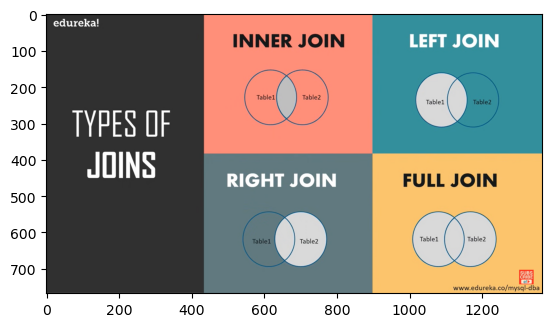

In [10]:
plt.imshow(img)
plt.show()

In [14]:
# Total no. of pixels = 768*1366 = 1049088

"""
If img originally has a shape of (height, width, 3), the total number of elements in the array is height * width * 3.
After reshaping with (-1, 3), the new shape will be (height * width, 3). This means:
Each row in the reshaped array represents a single pixel.
The 3 columns correspond to the RGB values of that pixel.

i.e., Total pixels = 1049088
So, X has 1,049,088 rows and 3 columns. Each row's columns represent the R, G, and B color codes.
"""

X = img.reshape((-1,3))
X.shape

(1049088, 3)

### Step 2: Finding Clusters / Finding Dominant colors in the image

In [17]:
k = 4
model = KMeans(n_clusters=k)
model.fit(X)

C:\Users\keerthana.r\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [18]:
# To get the centroids values

centroids = model.cluster_centers_
print(centroids) # this is an array of 4x3 --> i.e., 4 centroids colors 

[[ 47.82407162  47.74302723  47.70983066]
 [252.41031457 167.12582611 115.49513363]
 [ 74.80641205 131.70242961 141.24920085]
 [222.36539403 224.10452347 224.80496159]]


In [20]:
# RGB values range from 0 to 255, so we need to convert centroids points to intergers
colors = np.array(centroids,dtype='uint8')
print(colors) # this is an array of 4x3 with interger values

[[ 47  47  47]
 [252 167 115]
 [ 74 131 141]
 [222 224 224]]


In [22]:
"""
to visualize these obtained centroids i.e., dominant colours we need to create a patch and fill each centroid color.
will create a patch with 100x100 pixels
"""

'\nto visualize these obtained centroids i.e., dominant colours we need to create a patch and fill each centroid color.\nwill create a patch with 100x100 pixels\n'

### step 3: Creating patch to visualize obtained dominant colors

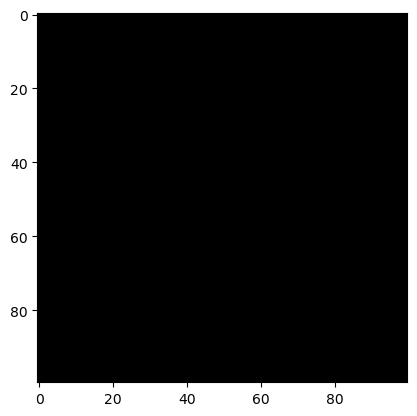

In [23]:
# create a black color patch (100,100,3)

blackpatch = np.zeros((100,100,3),dtype='uint8')
plt.imshow(blackpatch)
plt.show()

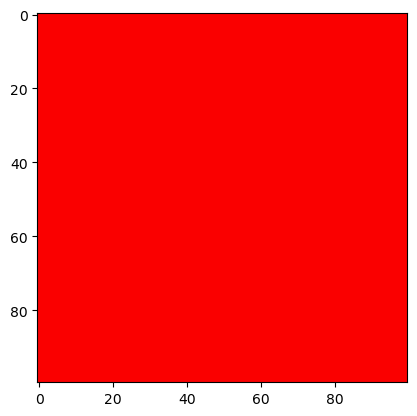

In [24]:
# create a red patch with 100x100 pixel 

redPatch = np.zeros((100,100,3),dtype='uint8') # this is the array of 100x100 with each element has 0,0,0 values
# to get red color, first value fo all the element must have maximum value near to 255
redPatch[:,:,0] = 250 # all rows, all columns of redPatch matrix are filled with 250 values. So each element has value (250,0,0)
plt.imshow(redPatch)
plt.show()

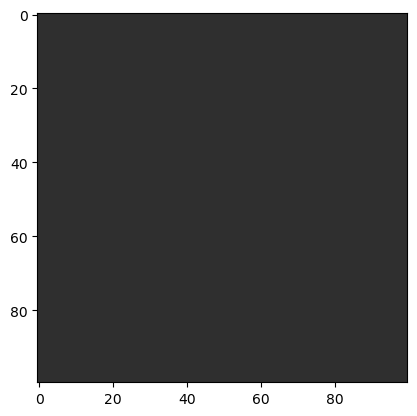

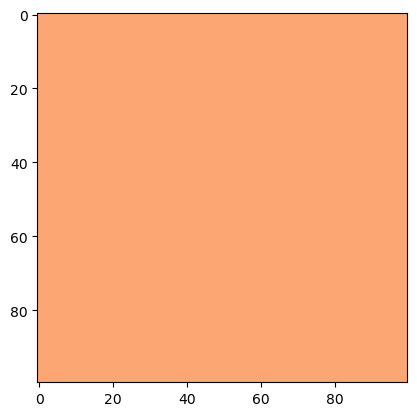

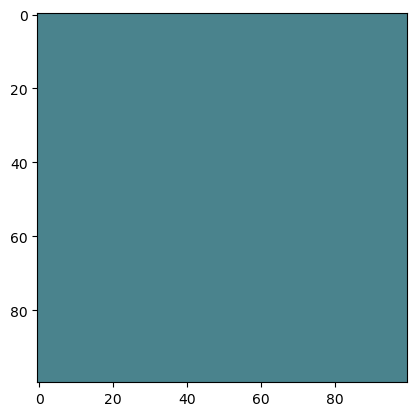

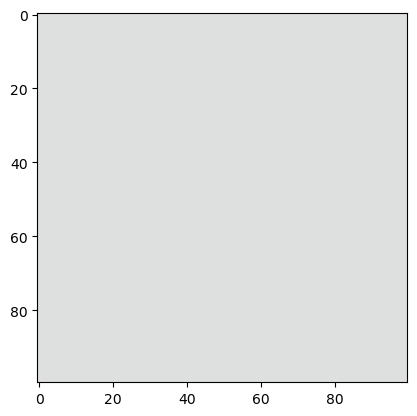

In [25]:
# So above we understood how to create an empty patch and to fill the required colours in the patch
# now we will create 4 patches for the obtained dominant colors

for color in colors:
    patch = np.zeros((100,100,3),dtype='uint8')
    patch[:,:,:]= color # all row,all coloum of each element and their all 3 R,G,B values are replaced with the values present in color variable
    plt.imshow(patch)
    plt.show()